March 24th, 2025

# [Whistler anisotropy instability with a cold electron component: Linear theory](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012JA017631)
### S. Peter Gary, Kaijun Liu, Richard E. Denton, Shuo Wu (2012)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

Marginal stability is given by 
$$A_{h} = \frac{T_{\perp h}}{T_{\|h}} - 1 =  \frac{S}{\beta_{\|h}^{\alpha}}$$
where $S$ and $\alpha$ are fitting parameters which vary with the assumed maximum growth rate $\gamma_{m}/ |\Omega_{ce}|$, such that 
$$S = 0.206 -0.107\frac{n_{c}}{n_{0}} -0.0326\frac{n_{c}^2}{n_{0}^2}$$
and 
$$\alpha = 0.574 + 0.178\frac{n_{c}}{n_{0}} -0.198\frac{n_{c}^2}{n_{0}^2}$$

In [5]:
def get_S(nc_n0):
    return 0.206 - 0.107*nc_n0 - 0.0326*(nc_n0**2)

In [6]:
def get_alpha(nc_n0):
    return 0.574 + 0.178*nc_n0 - 0.198*(nc_n0**2)

In [8]:
def get_A(nc_n0, beta_par):
    alpha = get_alpha(nc_n0=nc_n0)
    S = get_S(nc_n0=nc_n0)
    return S/(beta_par**alpha)

In [36]:
beta_par = np.linspace(0.02, 2)
nc_n0 = np.linspace(0, 0.95, 7)

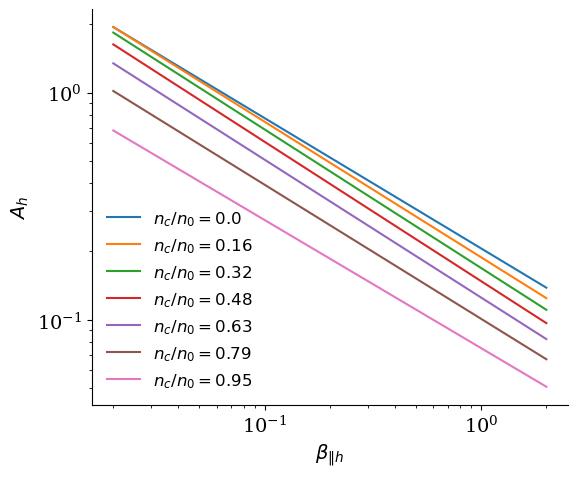

In [41]:
fig, ax = plt.subplots(figsize=(6, 5))
for nc in nc_n0:
    A = get_A(nc_n0=nc, beta_par=beta_par)
    ax.plot(beta_par, A, label=r"$n_{c}/n_{0} = " + str(round(nc, 2)) + "$")
    
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel(r"$\beta_{\|h}$")
ax.set_ylabel(r"$A_{h}$")
legend = ax.legend(loc='lower left', ncols=1, fancybox=False, shadow=False, fontsize=12)
legend.get_frame().set_alpha(0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()